# Final project

**Can you escape a velociraptor?**

Your goal is to figure out whether or not a velociraptor will catch you or if you can outrun it!

## Problem 1. Position vs. time

Suppose a velociraptor can run 18 m/s. And suppose you can run at 3 m/s, but you have a 30 meter head start. Assume that you and the 'raptor accelerate so quickly that you can ignore acceleration. 

Make a plot of the position vs. time for both you and the 'raptor (plot both on the same figure). Clearly label all axes and give the plot a legend. Plot over a suitable time frame. Save the figure as a .png file. 

*This plot will be included in your write-up*.

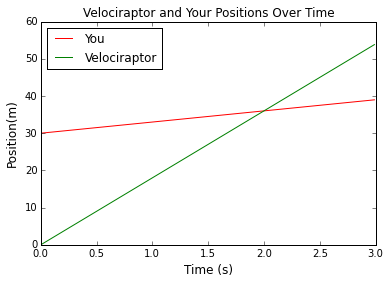

In [1]:
import numpy as np

t = [i for i in range(0,300)] # Time (sec)

x = [] # People position
v = [] # Velociraptor position
for i in t:
    z = 3 * i/100.0 + 30 # Equation for the human position
    x.append(z) # Add this value to our empty array

for i in t:
    y = 18 * i/100.0
    v.append(y)
    
import matplotlib.pylab as plt
%matplotlib inline

t2 = []

for i in t:
    c = i/100.0
    t2.append(c)

plt.plot(t2,x,'r',label="You",markersize=20)
plt.plot(t2,v,'g',label ="Velociraptor",markersize=20)

plt.xlabel('Time (s)',fontsize = 12)
plt.ylabel('Position(m)',fontsize = 12)

plt.title("Velociraptor and Your Positions Over Time")

plt.legend(loc = "upper left")

## Problem 2. When does the 'raptor catch up to you?

Use your code to figure out when the raptor catches up to you. Both how much time has passed and how far *you* have run.  

Do not just get this information off the graph. Use your Python code to figure this out! Getting the information just by looking at the plot will result in a 0 for this question. You can use an analytic approach (algebra) to check your answer, but that is not the approach I want you to use. Depending on how you write your code, you might not get an *exact* answer, but you should find a way to get pretty close to the algebraic solution. 

In [2]:
for i in t:
    if x[i] == v[i]: # When they are at the same position
        print "The velociraptor catches up to you at %d meters in %d seconds." %(x[i],i/100.0)
        break # No need to run the loop anymore because we got an answer

The velociraptor catches up to you at 36 meters in 2 seconds.


## Problem 3. When is it close enough to strike?

It turns out the 'raptor will start trying to attack when it is 1 meter away. How much time has passed and how far have you run when it is 1 meter behind you? Use a similar approach as the last problem. 

***Also make a new copy of the above plot, but label (with a line or arrow or whatever you want) the point at which the raptor is 1 meter behind you.***

In [3]:
for i in t:
    if x[i]-v[i]<1:
        print "The velociraptor is one meter behind you when you are at %.2f meters, which is after %.2f seconds." %(x[i],i/100.0) 
        break

The velociraptor is one meter behind you when you are at 35.82 meters, which is after 1.94 seconds.


## Problem 4. Will it bite you?

When the 'raptor is 1 meter away, it will try to bite you. If it doesn't bite you, it will try a second and (if necessary) a third time. If it doesn't get you on the third try, it will grow frustrated and stop chasing you. Hurray!

Suppose the first time it tries, there is a 20% chance it will bite you. If it misses and it needs to try a second time, there is only a 15% chance, and if it misses *that* time, there is only a 7% chance on the third try. 

If it bites you once, you're 'raptor food. If it misses all three times, you get away!

What is the probability that you will get away?


In [4]:
# Fred helped me

def death():
    first = np.random.randint(100) # Make random integers for all the points
    second = np.random.randint(100)
    third = np.random.randint(100)
    
    if first <= 20: # 20% chance of being bit
        return "Got ya!"
    if second <= 15: # 15% chance of being bit
        return "Dinner time!"
    if third <= 7:
        return "Finally!" # 7% chance of being bit 
    else:
        return "Gosh darn it!"
    
escape = 0
a_gruesome_demise_by_the_hand_of_God = 0

# What's a good word for death by velociraptor?
# "A gruesome demise by the hand of God" - Dan Finnegan

n = 10000 # How many time you want it to run

for i in range(0,n): # Run it this many times
    yay = death() # Set the function equal to a variable
    if yay == "Got ya!" or yay == "Dinner time!" or yay == "Finally!": # Failures
        a_gruesome_demise_by_the_hand_of_God += 1
        
    elif yay == "Gosh darn it!": # Successes
        escape += 1
    i += 1
    
chances = (escape/float(n)) * 100 # Percent of survival

print round(chances),"%"

61.0 %
